In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import scipy.stats as stats 

In [2]:
dfifa=pd.read_csv('fifa_stats.csv')
dfifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
dfifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [4]:
len(dfifa)

2000

In [9]:
dfifa.isnull().sum()/len(dfifa)*100

Name                        0.00
Age                         0.00
Nationality                 0.00
Overall_rating              0.00
Potential                   0.00
Club                        0.95
Preferred Foot              0.00
International Reputation    0.00
Weak Foot                   0.00
Skill Moves                 0.00
Work Rate                   0.00
Position                    0.00
Jersey Number               0.00
Height                      0.00
Weight                      0.00
dtype: float64

In [15]:
# we could observe that null values presence in club feature, i.e, 0.95% which is significantly less. 
#so, we can go ahead and drop the null values.

dfifa.dropna(inplace=True)


In [18]:
print(dfifa.Name.nunique())
print(dfifa.Name.unique())

1951
['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'A. Elis' 'M. FernÃ¡ndez'
 'D. RodrÃ\xadguez']


In [19]:
print(dfifa.Nationality.nunique())
print(dfifa.Nationality.unique())

95
['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Montenegro' 'Armenia' 'Switzerland' 'Norway' 'Czech Republic' 'Scotland'
 'Ghana' 'Central African Rep.' 'DR Congo' 'Ivory Coast' 'Russia'
 'Ukraine' 'Iceland' 'Mexico' 'Jamaica' 'Albania' 'Venezuela' 'Japan'
 'Turkey' 'Ecuador' 'Paraguay' 'Mali' 'Nigeria' 'Cameroon'
 'Dominican Republic' 'Israel' 'Kenya' 'Hungary' 'Republic of Ireland'
 'Romania' 'United States' 'Cape Verde' 'Australia' 'Peru' 'Togo' 'Syria'
 'Zimbabwe' 'Angola' 'Burkina Faso' 'Iran' 'Estonia' 'Tunisia'
 'Equatorial Guinea' 'New Zealand' 'FYR Macedonia' 'United Arab Emirates'
 'China PR' 'Guinea Bissau' 'Bulgaria' 'Kosovo' 'South Africa'
 'Madagascar' 'Georgia' 'Tanzania' 

In [20]:
print(dfifa.Club.nunique())
print(dfifa.Club.unique())

285
['FC Barcelona' 'Juventus' 'Paris Saint-Germain' 'Manchester United'
 'Manchester City' 'Chelsea' 'Real Madrid' 'AtlÃ©tico Madrid'
 'FC Bayern MÃ¼nchen' 'Tottenham Hotspur' 'Liverpool' 'Napoli' 'Arsenal'
 'Milan' 'Inter' 'Lazio' 'Borussia Dortmund' 'Vissel Kobe'
 'Olympique Lyonnais' 'Roma' 'Valencia CF'
 'Guangzhou Evergrande Taobao FC' 'FC Porto' 'FC Schalke 04'
 'BeÅŸiktaÅŸ JK' 'LA Galaxy' 'Sporting CP' 'Real Betis'
 'Olympique de Marseille' 'RC Celta' 'Bayer 04 Leverkusen' 'Real Sociedad'
 'Villarreal CF' 'Sevilla FC' 'SL Benfica' 'AS Saint-Ã‰tienne' 'AS Monaco'
 'Leicester City' 'Atalanta' 'GrÃªmio' 'AtlÃ©tico Mineiro' 'RB Leipzig'
 'Ajax' 'Dalian YiFang FC' 'Everton' 'West Ham United' '1. FC KÃ¶ln'
 'TSG 1899 Hoffenheim' 'Shanghai SIPG FC' 'OGC Nice' 'Al Nassr'
 'Wolverhampton Wanderers' 'Borussia MÃ¶nchengladbach' 'Hertha BSC'
 'SV Werder Bremen' 'Cruzeiro' 'Athletic Club de Bilbao' 'Torino'
 'Medipol BaÅŸakÅŸehir FK' 'Beijing Sinobo Guoan FC' 'Crystal Palace'
 'PFC CSKA Mos

In [21]:
print(dfifa['Preferred Foot'].nunique())
print(dfifa['Preferred Foot'].unique())

2
['Left' 'Right']


In [22]:
print(dfifa['Work Rate'].nunique())
print(dfifa['Work Rate'].unique())

8
['Medium/ Medium' 'High/ Low' 'High/ Medium' 'High/ High' 'Medium/ High'
 'Medium/ Low' 'Low/ High' 'Low/ Medium']


In [23]:
print(dfifa['Position'].nunique())
print(dfifa['Position'].unique())

27
['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']


In [56]:
print(dfifa['Skill Moves'].nunique())
print(dfifa['Skill Moves'].unique())

5
[4 5 1 3 2]


#### a) Assumed age as population, performed the central limit theorem with sample size of 200. Found the standard error and the mean of sampling distribution. Compared the results with population mean and standard deviation. Explained in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

In [33]:
pop=dfifa.Age
sample_size=200
no_of_samples=100
sample_mean_list=[]

for s in range(no_of_samples):
    
    sample=np.random.choice(pop,size=200,replace=True)
    sample_mean=np.mean(sample)
    sample_mean_list.append(sample_mean)

np.mean(sample_mean_list),np.std(sample_mean_list,ddof=1)

(27.25105, 0.2814386696022327)

In [45]:
pop=dfifa.Age

print('Population Mean:',np.mean(dfifa.Age))
print('Population standard deviation:',np.std(dfifa.Age,ddof=1))

Population Mean: 27.215547703180214
Population standard deviation: 3.8525185996930396


In [42]:
sample_size=200
sample=np.random.choice(pop,size=sample_size,replace=True)
print('Sample Mean:',np.mean(sample))
print('Standard Error:',np.std(dfifa.Age,ddof=1)/np.sqrt(sample_size))

Sample Mean: 26.905
Standard Error: 0.27241420264902505


In [43]:
#sample size increase to 400
sample_size=400
sample=np.random.choice(pop,size=sample_size,replace=True)
print('Sample Mean:',np.mean(sample))
print('Standard Error:',np.std(dfifa.Age,ddof=1)/np.sqrt(sample_size))

Sample Mean: 27.385
Standard Error: 0.19262592998465197


In [44]:
#sample size increase to 600
sample_size=600
sample=np.random.choice(pop,size=sample_size,replace=True)
print('Sample Mean:',np.mean(sample))
print('Standard Error:',np.std(dfifa.Age,ddof=1)/np.sqrt(sample_size))

Sample Mean: 27.315
Standard Error: 0.15727841323049188


In [ ]:
#INFERENCE:
# As we could obeserve the standard error keeps decreasing with increase in sample size. 
# As the sample size increase the distribution become more normal, thereby decreasing the standard eror.

### b) Provided evidence that the players overall rating is greater than 80.

In [47]:
dfifa.Overall_rating.describe()

count    1981.000000
mean       78.212014
std         3.293624
min        75.000000
25%        76.000000
50%        77.000000
75%        80.000000
max        94.000000
Name: Overall_rating, dtype: float64

In [48]:
#continuous variable 

#one sample t test 

#Hypothesis formation
# Ho: mu = 80 
# Ha: mu !=80

stats.ttest_1samp(dfifa.Overall_rating,popmean=80)

Ttest_1sampResult(statistic=-24.161970492711205, pvalue=3.0006946846662113e-113)

In [ ]:
# pvalue=0.0
# siglvl=0.05
# pvalue<siglvl, hence, Ho is rejected and Ha is selected 
# Here, tstat value is negative, implies , the average overall rating is less than 80
# Thus the claim is false. There is NO evidence that the players overall rating is greater than 80

### c) Performed the statistical test to identify whether preferred foot has any impact on potential. Also, performed the graphical analysis.

In [51]:
# preferred foot (categorical)
# Potential(Numerical)

# two sample independent t test

#hypothesis formation
# Ho: mu_Potential_left=mu_potential_right (No effect)
# Ha: mu_Potential_left!=mu_potential_right (effect)

left=dfifa[dfifa['Preferred Foot']=='Left']['Potential']
right=dfifa[dfifa['Preferred Foot']=='Right']['Potential']

stats.ttest_ind(left,right)

Ttest_indResult(statistic=1.6316202307100005, pvalue=0.1029186188520214)

In [ ]:
#INFERNCE:
# Pvalue=0.102
# Siglvl=0.05
# Pvalue>Siglvl, hence, Ho is selected 
# Implies, There is no effect on potential with respect to prefered foot 

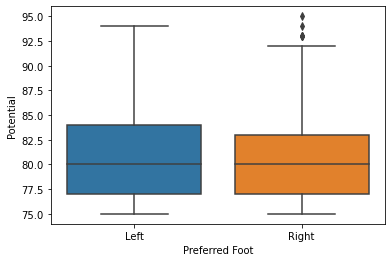

In [53]:
sb.boxplot(data=dfifa,x=dfifa['Preferred Foot'],y=dfifa['Potential'])
plt.show()

In [ ]:
INFERENCE:
# From the above graph, it is clearly observed that, the average/median of potential for both the feet is same. 
#Hence, there wont be any significant impact of foot on potential of the player

### d) Performed the statistical test to identify the relation between the overall rating and potential.

In [54]:
#Pearson r relation test

# Hypothesis formation
# Ho: corr=0 (no effect/no relation)
# Ha: corr!=0 (effect/relation)

stats.pearsonr(dfifa['Overall_rating'],dfifa['Potential'])

(0.732085835890994, 0.0)

In [ ]:
INFERENCE:
# Pvalue=0.0
# Siglvl=0.05
# Pvalue<Siglvl, Hence, Ho is rejected, Ha is selected
# Implies, there is a relation between the overall rating and potential.

In [55]:
# Using 2 sample t test
stats.ttest_ind(dfifa['Overall_rating'],dfifa['Potential'])

Ttest_indResult(statistic=-17.86119755089141, pvalue=1.0957726628240538e-68)

In [ ]:
INFERENCE:
# Pvalue=0.0
# Siglvl=0.05
# Pvalue<Siglvl, Hence, Ho is rejected, Ha is selected
# Implies, there is a relation between the overall rating and potential.

### e) Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.

In [59]:
stats.pearsonr(dfifa['Overall_rating'],dfifa['Skill Moves'])

(0.08303643058332785, 0.00021570230856720446)

In [63]:
#considering skill move as categorical variable 
#over_all rating as numerical variable 

# ANOVA test

#Hypothesis formation
# Ho: Mean of all categories are equal (No effect)
# Ha: Mean of any of the categories are not equal (effect)

SM_1=dfifa[dfifa['Skill Moves']==1]['Overall_rating']
SM_2=dfifa[dfifa['Skill Moves']==2]['Overall_rating']
SM_3=dfifa[dfifa['Skill Moves']==3]['Overall_rating']
SM_4=dfifa[dfifa['Skill Moves']==4]['Overall_rating']
SM_5=dfifa[dfifa['Skill Moves']==5]['Overall_rating']

stats.f_oneway(SM_1,SM_2,SM_3,SM_4,SM_5)

F_onewayResult(statistic=30.65461769112108, pvalue=8.630701393554627e-25)

In [ ]:
INFERENCE:
# Pvalue=0.0
# Siglvl=0.05
# Pvalue<Siglvl, Hence, Ho is rejected,Ha is selected 
# Implies, skill move have any effect in overall rating

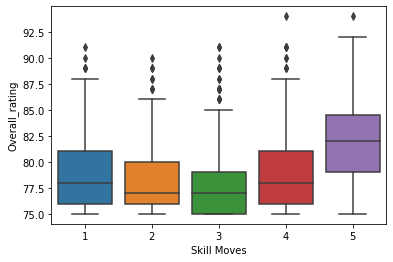

In [66]:
sb.boxplot(data=dfifa,x=dfifa['Skill Moves'],y=dfifa['Overall_rating'])
plt.show()

INFERENCE:
from the above graph, we could observe that, there median of overall rating is not aline w.r.t to skill moves categories. 
where Skill moves 5 having the highest average overall rating and skill moves 3 average being the lowest. 